# Credit Score Prediction

Alfia N. Rakhmatika

Background<br>
Memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman datap diberikan dengan principal, maturity, dan repayment calendar yang akan memotivsi pelanggan untuk sukses.

# Load Modules and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings

from scipy import stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

warnings.simplefilter(action='ignore')
%matplotlib inline

In [2]:
# Load Data 

path = 'application_train.csv'
dfraw = pd.read_csv(path, sep=',')
df = dfraw.copy()
pd.set_option("display.max_columns", None)
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

From above data, the target can be found in column `TARGET`. Other columns are features.

## Checking Missing Value

In [4]:
print ("Missing Value per Features:")
pd.set_option('display.max_rows',None)
df.isna().sum()

Missing Value per Features:


SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

Text(0, 0.5, 'Null Rate')

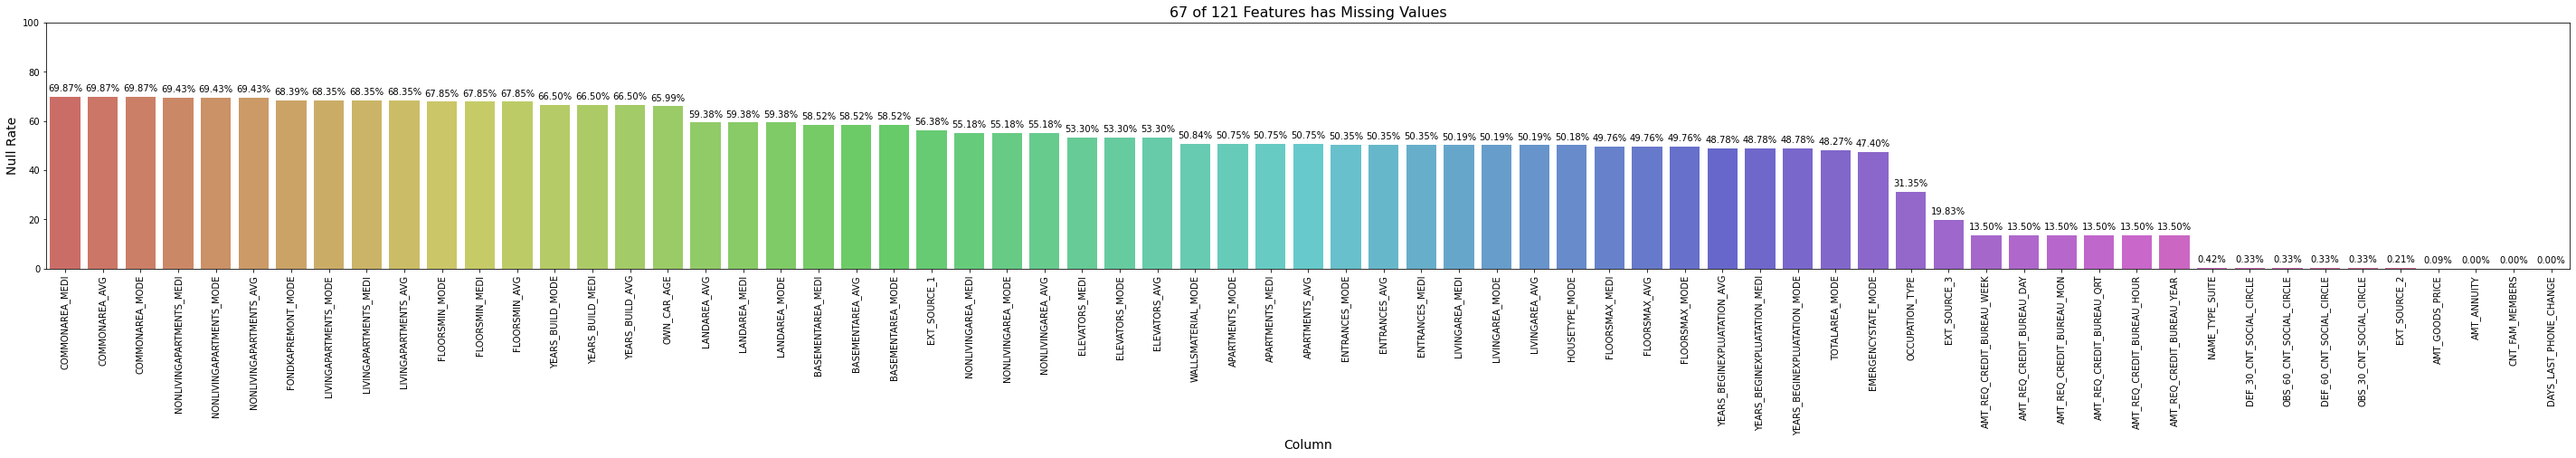

In [5]:
# Create barchart to show the percentage of missing value for feature with missing value

tab = df.columns
table = pd.DataFrame(tab)

nullrate = []
for i in df.columns:
    if df[i].isna().sum() > 0:
        null_rate = df[i].isna().sum() / len(df) * 100
        nullrate.append(null_rate)
    else:
        nullrate.append(0)

table['Null Rate'] = nullrate

table.columns = ['Column', 'Null Rate']
table = table[table['Null Rate'] > 0]
table = table.sort_values(by='Null Rate', ascending=False)

plt.figure(figsize=(50,5))
ax = sns.barplot(x='Column', y='Null Rate', data = table, palette="hls")
ax.set_title('67 of 121 Features has Missing Values', fontsize = 16)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set(ylim=(0, 100))
plt.xlabel('Column', fontsize = 14)
plt.xticks(rotation=90)
plt.ylabel('Null Rate', fontsize = 14)

In [6]:
# Display dataframe of Null Rate
table

,Column,Null Rate
76,COMMONAREA_MEDI,69.872297
48,COMMONAREA_AVG,69.872297
62,COMMONAREA_MODE,69.872297
84,NONLIVINGAPARTMENTS_MEDI,69.432963
70,NONLIVINGAPARTMENTS_MODE,69.432963
56,NONLIVINGAPARTMENTS_AVG,69.432963
86,FONDKAPREMONT_MODE,68.386172
68,LIVINGAPARTMENTS_MODE,68.354953
82,LIVINGAPARTMENTS_MEDI,68.354953
54,LIVINGAPARTMENTS_AVG,68.354953


Most of the features with high missing values are about the building where the client lives. Because of the high rate of missing values, there are 2 alternatives for further handling (because dropping the rows would decrease dataset by more than 50%):<br>
* Imputation
* Dropping feature, also to decrease dimensionality

In this case, features with more than 40% missing value will be dropped and the rest will be imputed with median.

In [7]:
# Set columns to drop to a list
table = table[table['Null Rate'] > 40]
to_drop = table['Column'].tolist()

# Drop columns
df.drop(to_drop, axis=1, inplace=True)

# Show df shape
df.shape

(307511, 73)

## Checking Duplicate Values

In [8]:
df.duplicated().sum()

0

There is no duplicate values found in the dataset

## Checking Target Imbalance

[Text(0.5, 0, 'Target'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Huge Target Imbalance')]

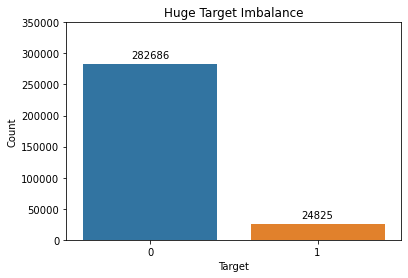

In [9]:
target = df.groupby(['TARGET']).CODE_GENDER.agg('count').reset_index()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4), sharey=True)
ax = sns.barplot(x='TARGET', y='CODE_GENDER', data=target)

for p in ax.patches:
    ax.annotate('{}'.format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax.set(ylim=(0, 350000))
ax.set(xlabel='Target', ylabel='Count', title='Huge Target Imbalance')

## Check All Values per Columns

In [10]:
for col in df.columns:
    print(f'Values of Columns {col}:')
    print(df[col].unique())
    print()

Values of Columns SK_ID_CURR:
[100002 100003 100004 ... 456253 456254 456255]

Values of Columns TARGET:
[1 0]

Values of Columns NAME_CONTRACT_TYPE:
['Cash loans' 'Revolving loans']

Values of Columns CODE_GENDER:
['M' 'F' 'XNA']

Values of Columns FLAG_OWN_CAR:
['N' 'Y']

Values of Columns FLAG_OWN_REALTY:
['Y' 'N']

Values of Columns CNT_CHILDREN:
[ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]

Values of Columns AMT_INCOME_TOTAL:
[202500.  270000.   67500.  ...  96768.  546250.5 113062.5]

Values of Columns AMT_CREDIT:
[ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]

Values of Columns AMT_ANNUITY:
[24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]

Values of Columns AMT_GOODS_PRICE:
[ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]

Values of Columns NAME_TYPE_SUITE:
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

Values of Columns NAME_INCOME_TYPE:
['Working' 'State servant' 'Commercial associa

From the list above, there are several things to note:<br>
* Feature `SK_ID_CURR` is only ID, this features is not relevant for ML train.
* Feature `CODE_GENDER` has value XNA, this can be inferred as the equivalent of missing value, and need to be addressed.
* Feature `FLAG_OWN_CAR` and `FLAG_OWN_REALTY` has value Y and N, that can be changed to 1 and 0 for machine learning training. However, features with values 1 and 0 are actually categorical values. The value of these feature will be changed for EDA.

# Exploratory Data Analysis

In [11]:
# Separate data categorical dan numerical
num_dtypes=['int64','float64']
cat_dtypes=['object']

num_df = df.select_dtypes(include = num_dtypes)
cat_df = df.select_dtypes(include = cat_dtypes)
numericals = num_df.columns
categoricals = cat_df.columns

print(numericals)
print(categoricals)

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

# Change Value 0 and 1 for several features

catfeatures = []

## Numerical

In [12]:
df[numericals].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000

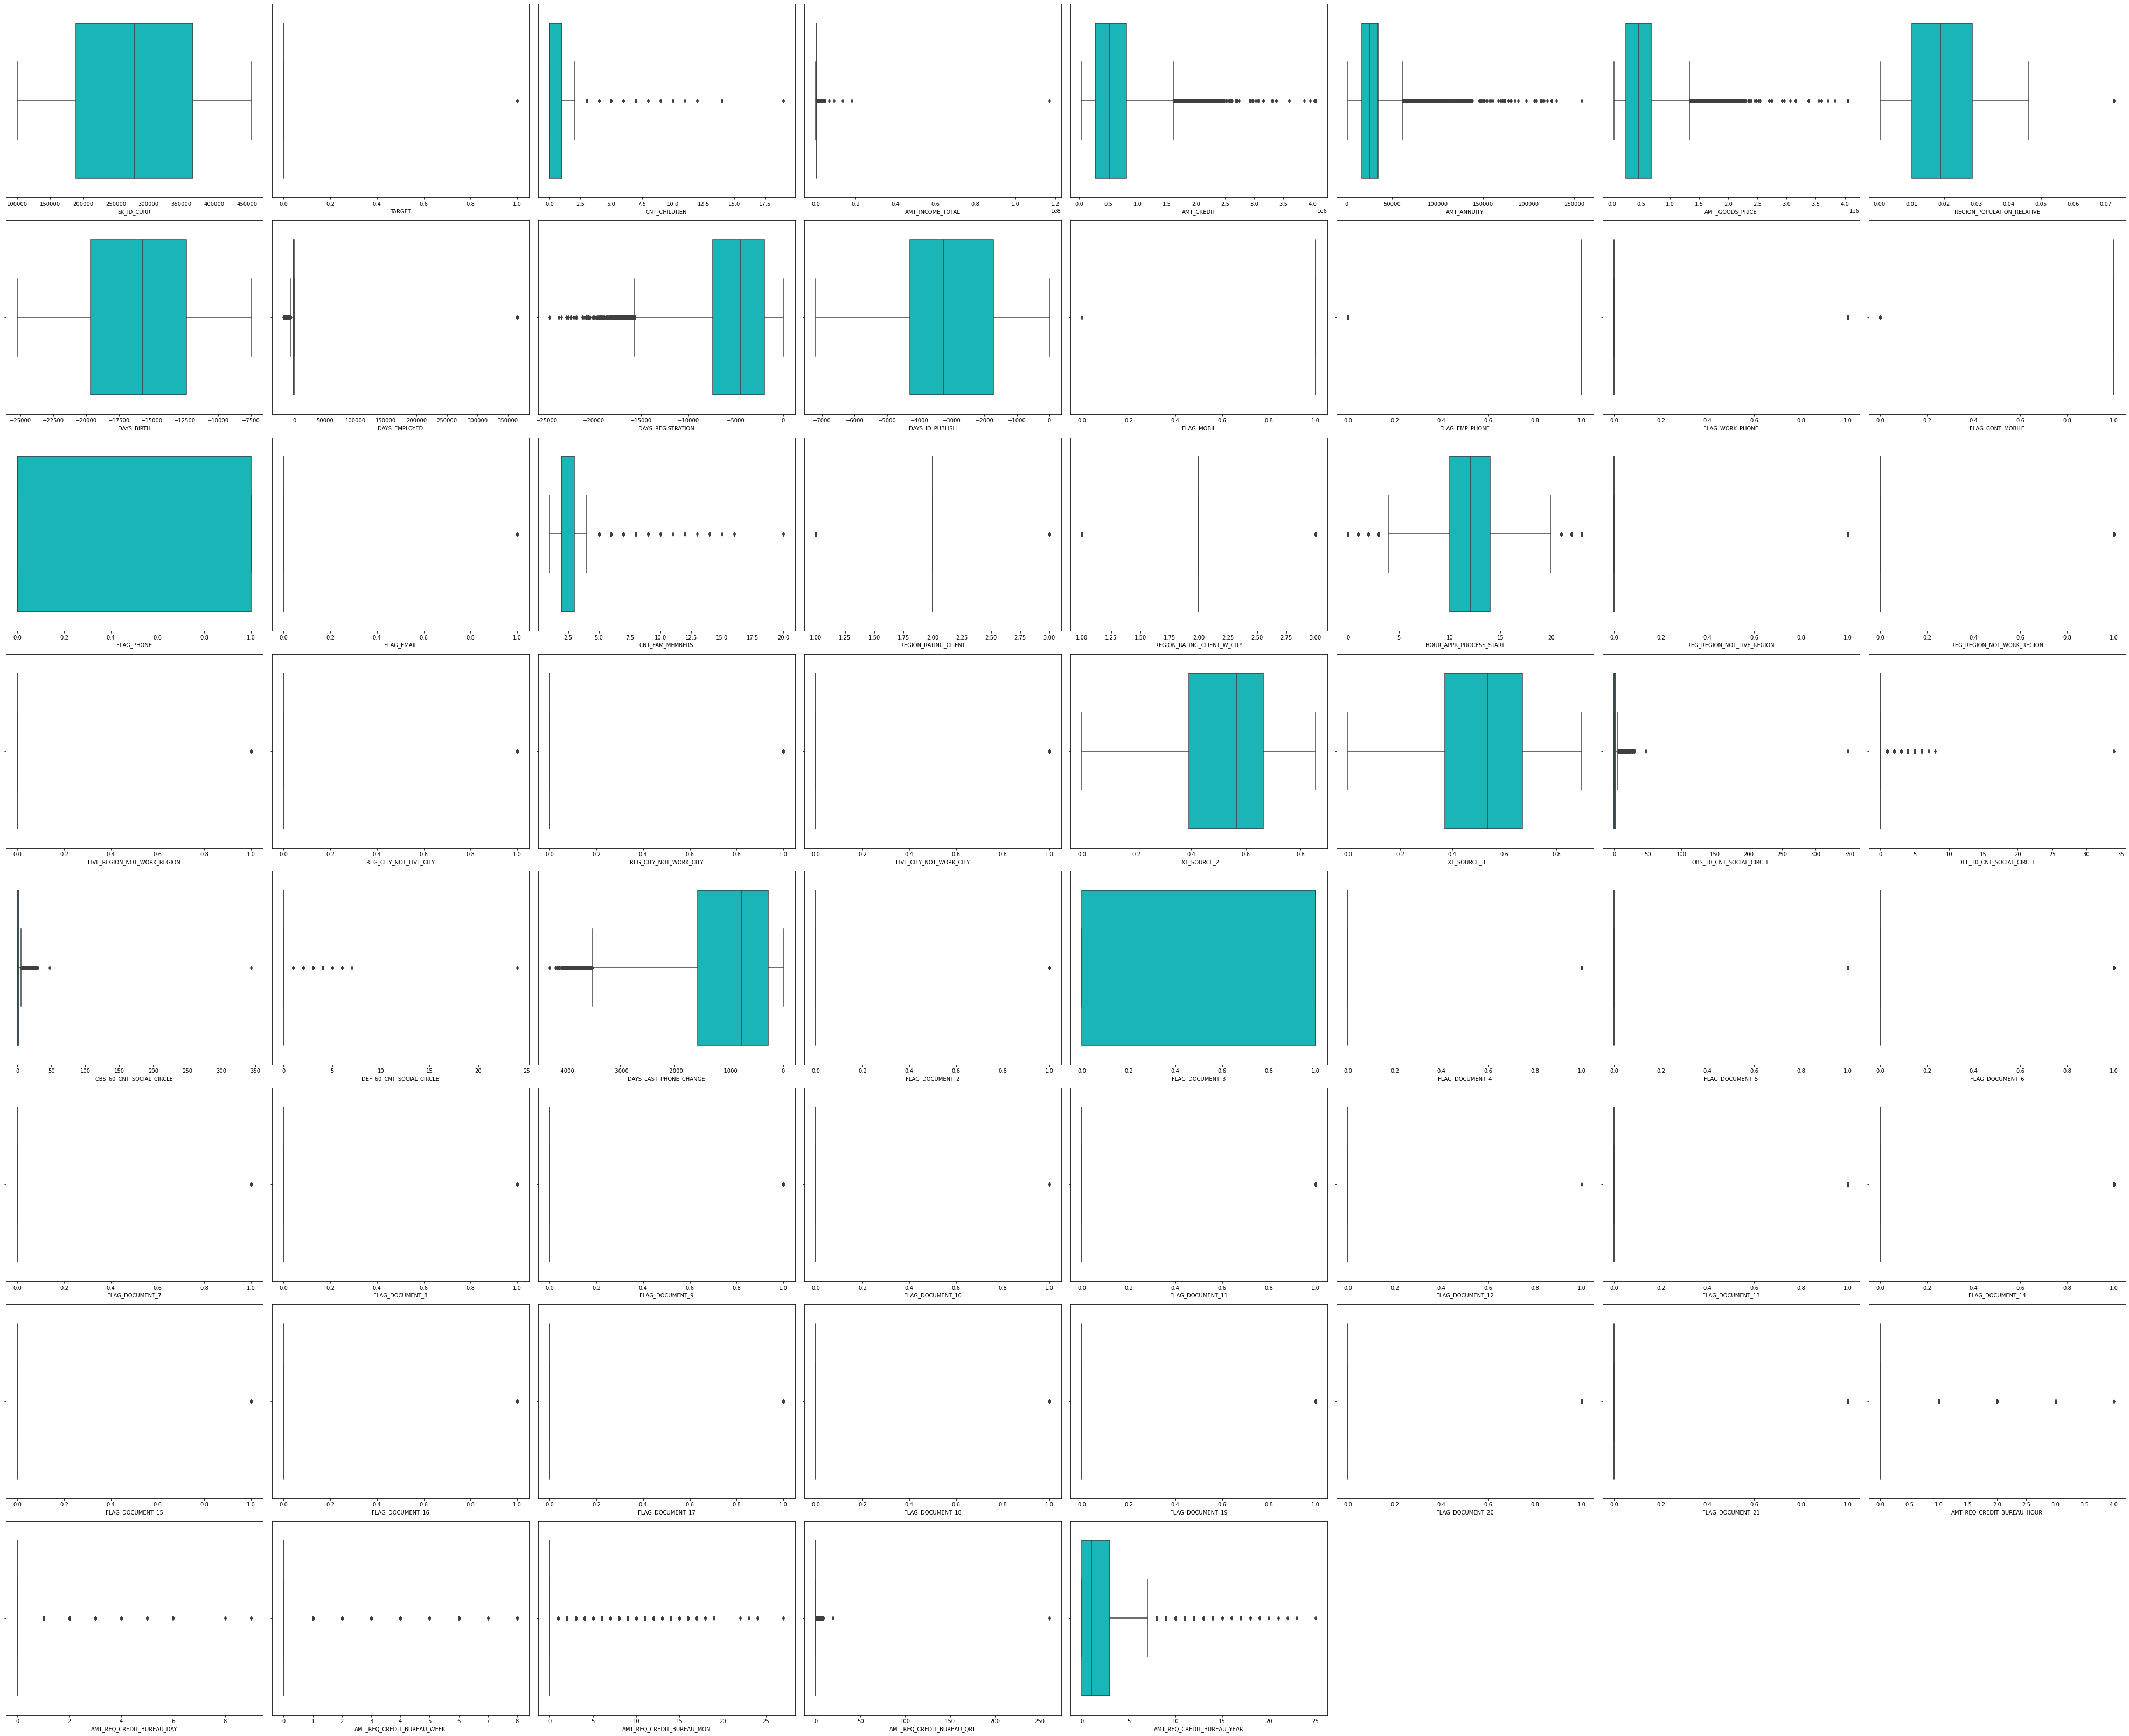

In [15]:
# Boxplot
plt.figure(figsize=(55, 50))
for col in range(0, len(numericals)):
    plt.subplot(9, len(numericals)//7, col+1)
    sns.boxplot(x=df[numericals[col]], color='darkturquoise', orient='h')
    plt.tight_layout()

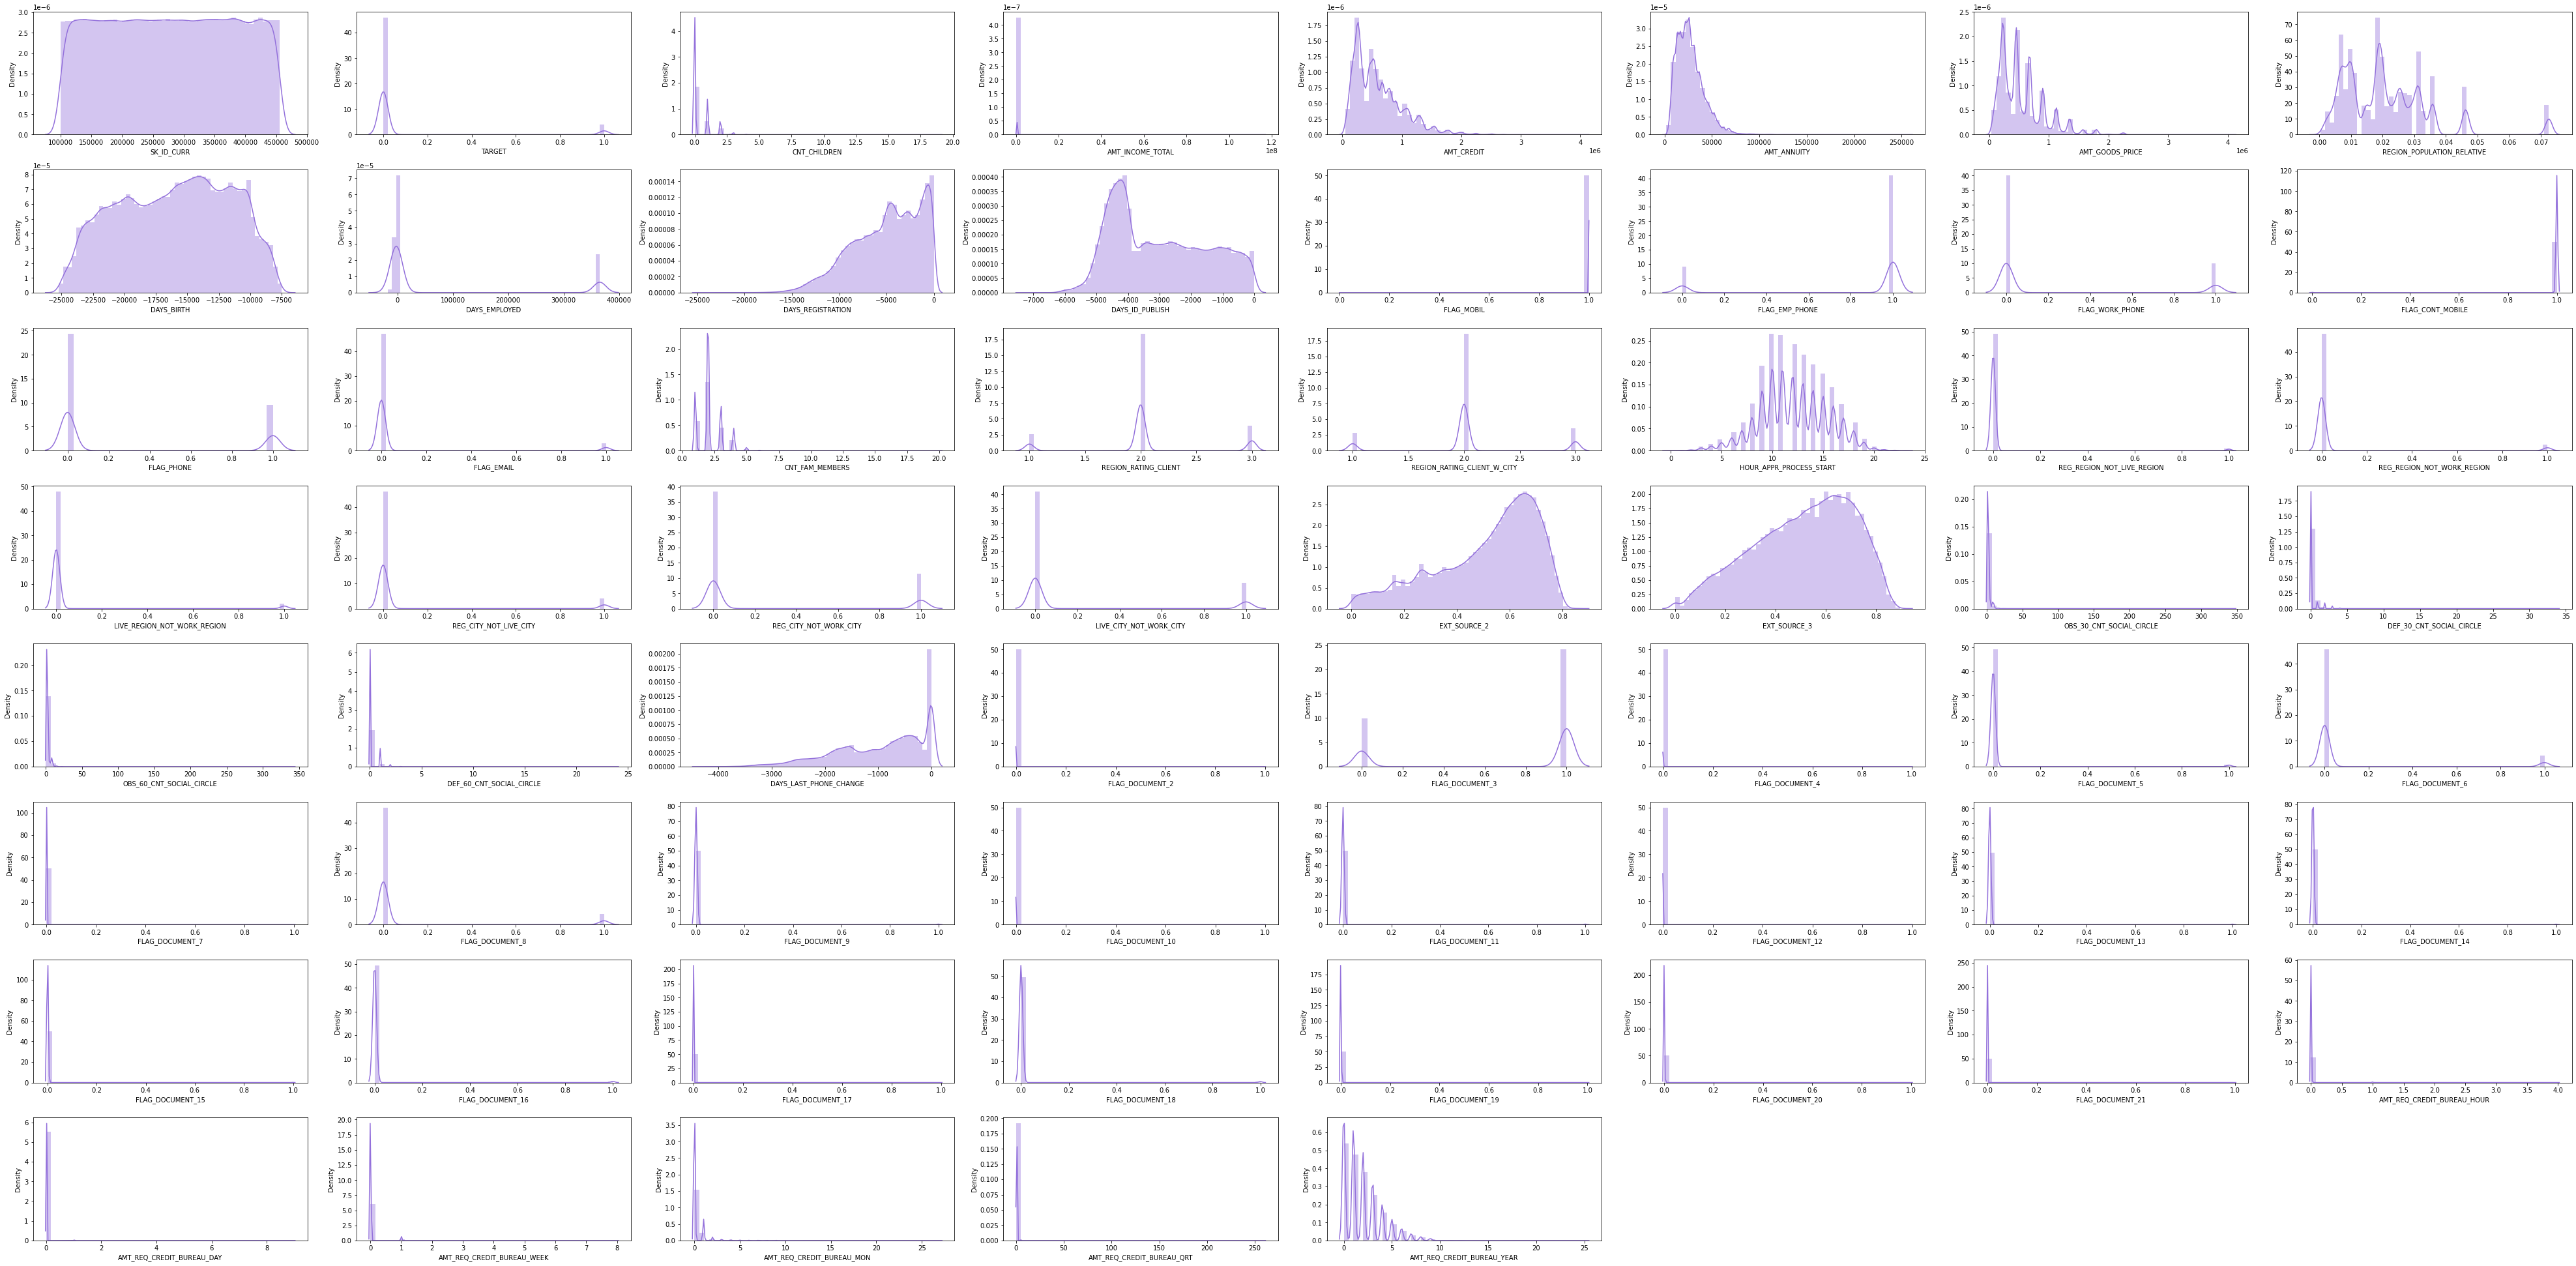

In [16]:
# Distplot
plt.figure(figsize=(55, 30))
for col in range(0, len(numericals)):
    plt.subplot(9, len(numericals)//7, col+1)
    sns.distplot(df[numericals[col]], color='mediumpurple')
    plt.tight_layout()

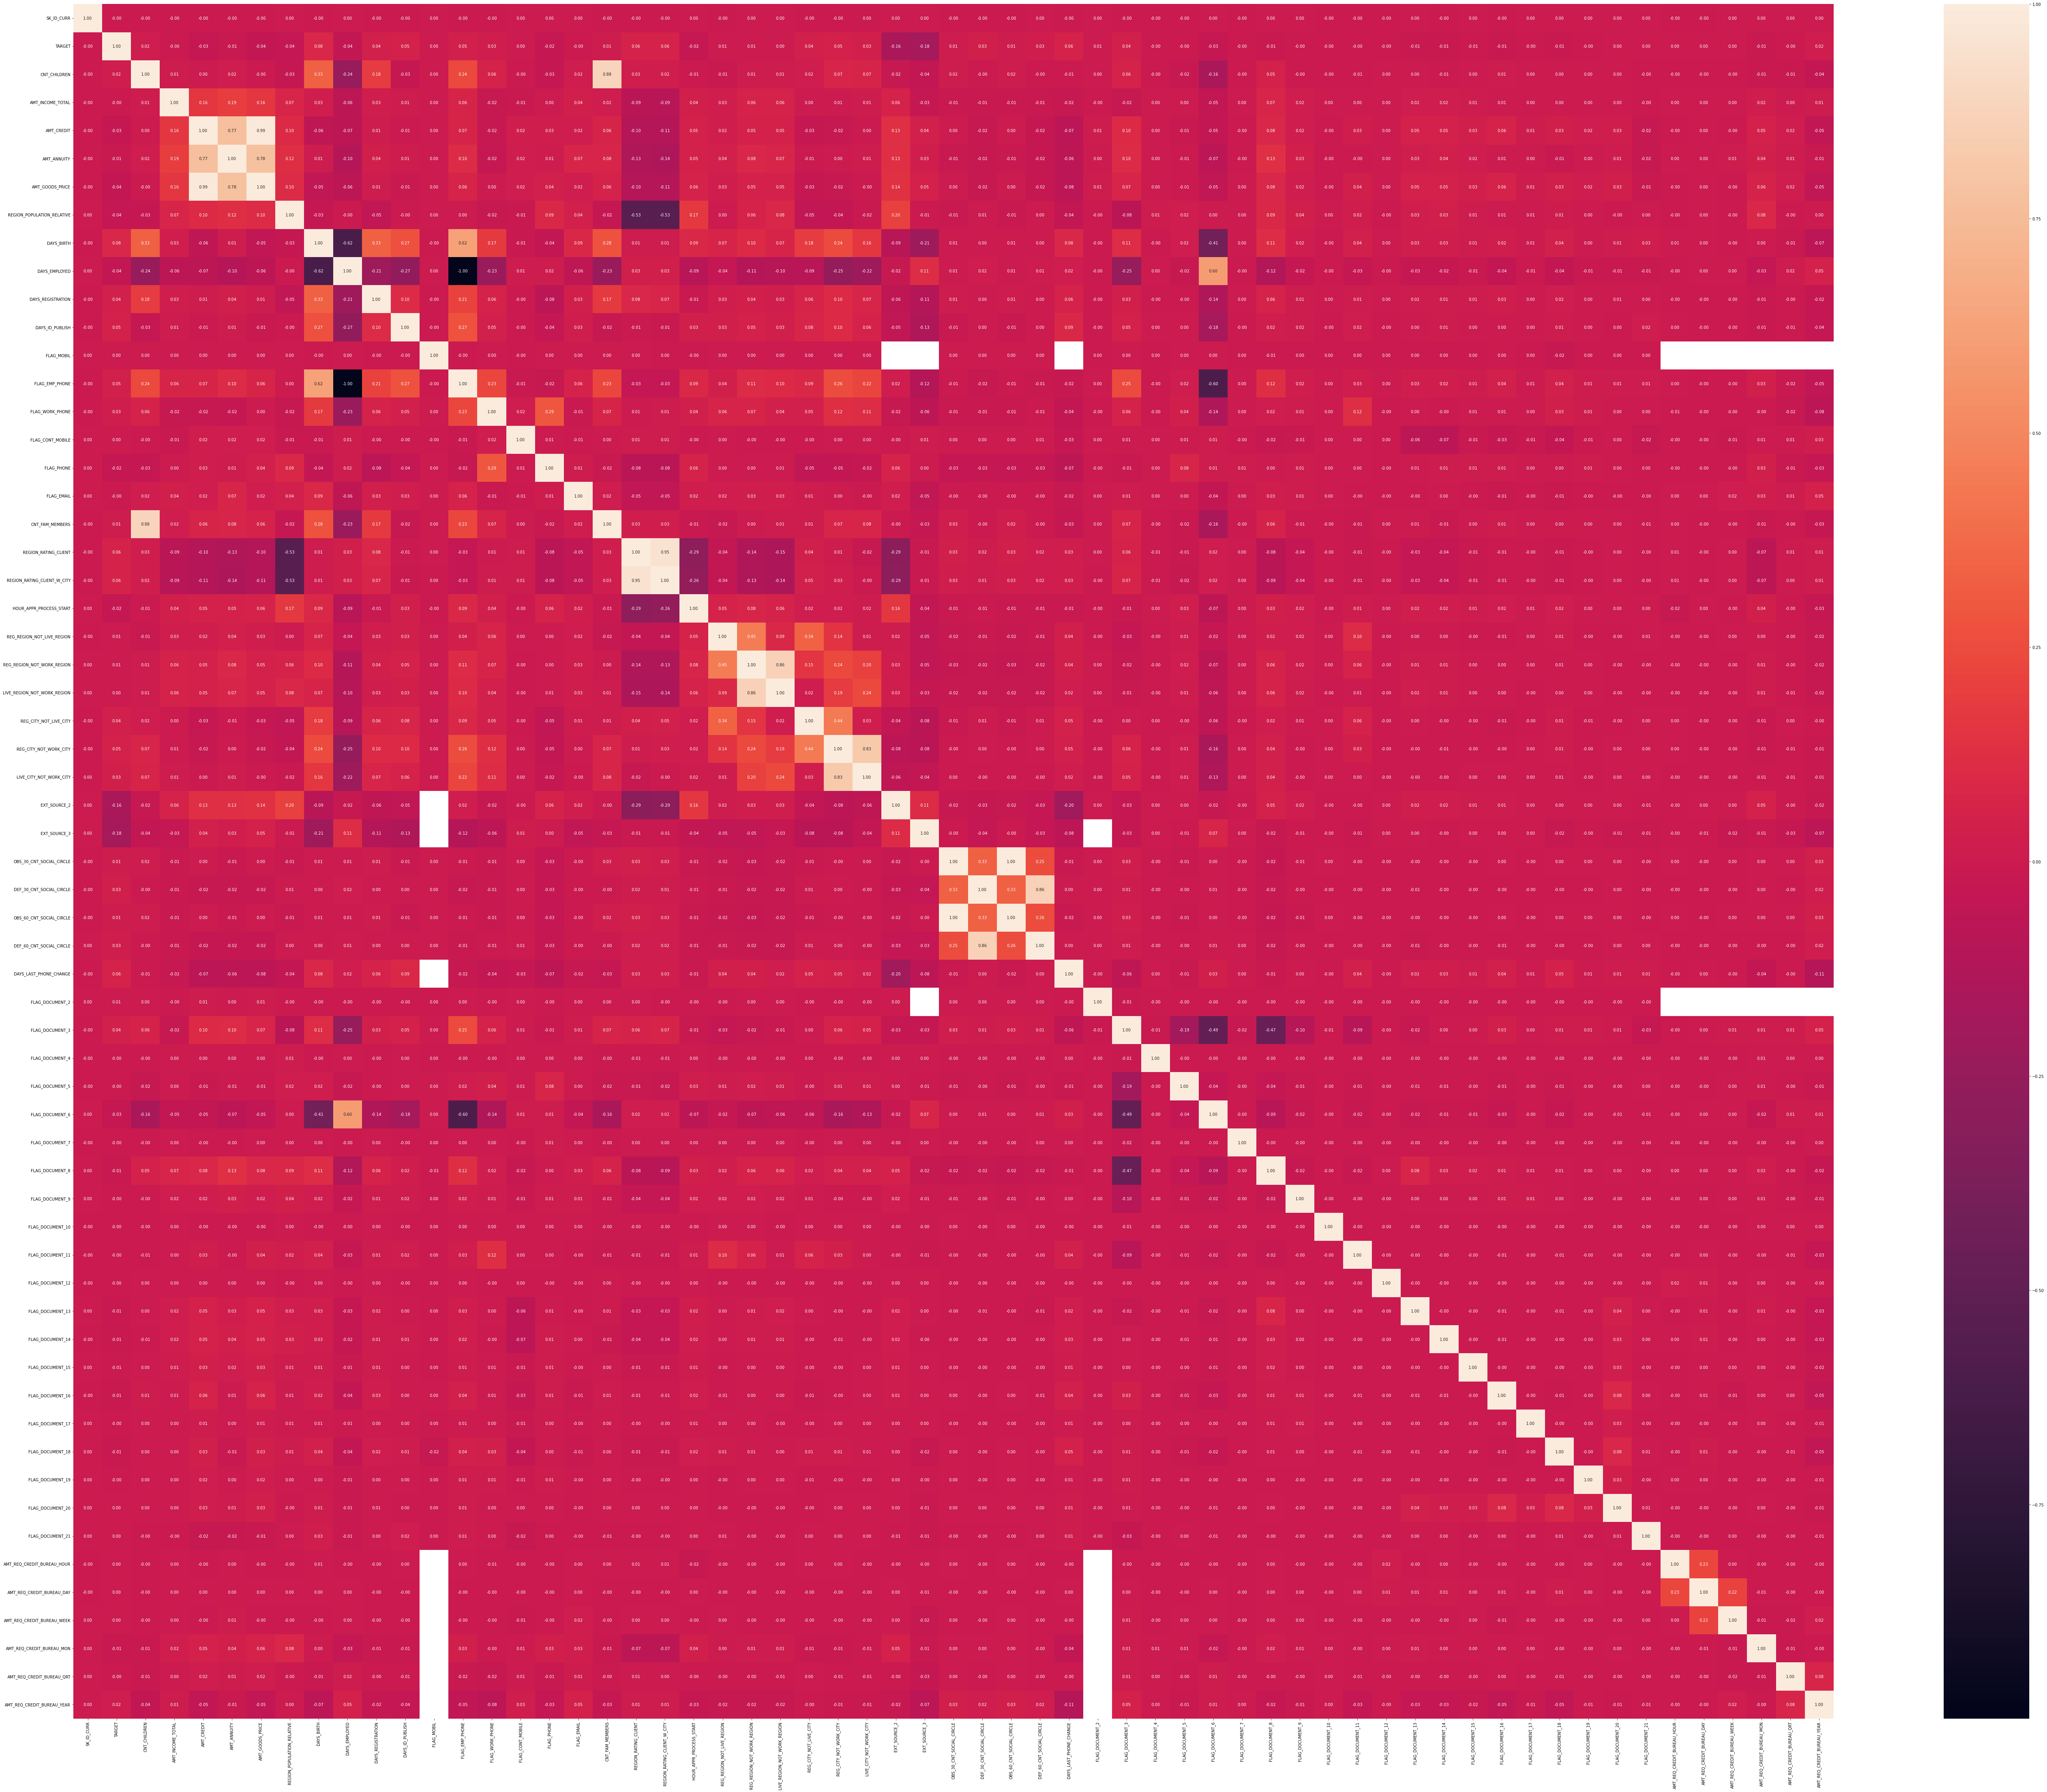

In [23]:
# Heatmap
plt.figure(figsize = (100,80))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
warnings.filterwarnings("ignore")

In [55]:
plt.figsize=((100,100))
sns.pairplot(df[1:], diag_kind='kde',hue='TARGET')
warnings.filterwarnings("ignore")

## Categorical

In [18]:
df[categoricals].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511
unique,2,3,2,2,7,8,5,6,6,18,7,58
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992


In [50]:
# Categorical Heatmap

# Add Target for Categorical Heatmap
cat = categoricals
target = pd.Index(['TARGET'])
cat = cat.append(target)

# Change 
datacat = df[cat]

# Imputation 
for i in datacat.columns:
  datacat[i].fillna('Null Value',inplace=True)

# Encode data
data_encoded = datacat.copy()
for i in datacat.columns :
  data_encoded[i] = LabelEncoder().fit_transform(datacat[i])

def cramers_V(var1,var2) :
    crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Menghitung total data per kolom dan row
    chi2 = stats.chi2_contingency(crosstab)[0] # Mengambil hasil Chi2 test
    n = np.sum(crosstab) # Total data observation
    phi2 = chi2 / n
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


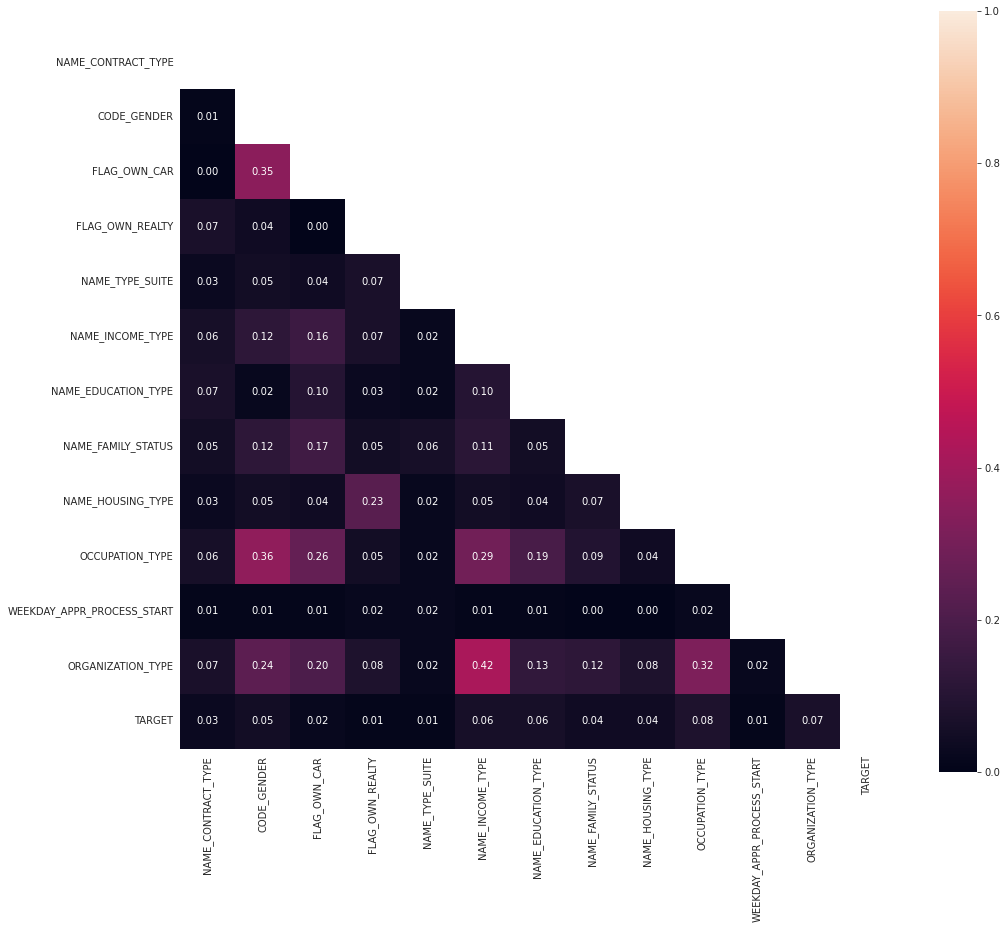

In [51]:
# Categorical correlation

rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
res = pd.DataFrame(cramers_results, columns = data_encoded.columns, index = data_encoded.columns)

mask = np.zeros_like(res, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(16,14))
with sns.axes_style("white"):
  ax = sns.heatmap(res, mask=mask, vmin=0., vmax=1, square=True, annot=True, fmt='.2f')

plt.show()

In [54]:
plt.figure(figsize=(20,20))
for i in range(0, len(categoricals)):
    plt.subplot(3, round(len(categoricals)/3,0), i+1)
    if i+1 in (4,6):
      sns.countplot(df[categoricals[i]], orient='v')
      plt.xticks(
      rotation=45, 
      horizontalalignment='right',
      fontweight='light',
      fontsize='small'  
)
    else:
       sns.countplot(df[categoricals[i]], orient='v')
    plt.tight_layout()

# Imputation & Feature Engineering

In [52]:
# Display data all columns
pd.set_option("display.max_columns", None)
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
df.shape

(307511, 55)

From EDA, we need to drop several column to minimize dimension. The columns dropped and the reasons:
*   `SK_ID_CURR`: Irrelevant to Machine Learning training.
* 

We also have to do the following data handling:
*

In [ ]:
# Drop several columns more due to reasons above
dropcolumn = []
df.drop(dropcolumn, axis=1, inplace=True)

## Imputation

In [ ]:
num_df = df.select_dtypes(include = num_dtypes)
cat_df = df.select_dtypes(include = cat_dtypes)
numericals = num_df.columns
categoricals = cat_df.columns

In [ ]:
# All numerical data will be imputed with median
for i in numericals:
  df[i].fillna(df[i].median(),inplace=True)

# Encoding

## Label Encoding

In [ ]:
# Label encoding untuk home_ownership, verification_status, loan_status, initial_list_status
replacer= {"home_ownership":{'OWN': 5, 'RENT': 4, 'MORTGAGE': 3, 'OTHER': 2, 'ANY': 1, 'NONE': 0}, 
           "verification_status":{'Verified': 3, 'Source Verified': 2, 'Not Verified': 1},
           "initial_list_status":{'f': 1, 'w': 2}
           }

In [ ]:
# Encode
df = df.replace(replacer)

# Show df shape
df.shape

## One Hot Encoding

In [ ]:
# One hot encoding for the rest of categoricals data
for col in ['grade', 'purpose']:
  df = pd.get_dummies(df, columns=[col], prefix=[col])

## Numerical Data Handling

In [ ]:
num_df = df.select_dtypes(include = num_dtypes)
numericals = num_df.columns
numericals

In [ ]:
numpro = ['loan_amnt', 'term', 'int_rate', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'recoveries', 'last_pymnt_amnt', 'acc_now_delinq', 'tot_cur_bal',
       'emp_length_point']
X_raw_num = df[numpro]
X_raw_num.head()

In [ ]:
#check skewness
for col in X_raw_num.columns:
    print("Column %s skewness = %.2f" % (col, X_raw_num[col].skew()))

In [ ]:
# Outlier percentage
for k, v in X_raw_num.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(X_raw_num)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

In [ ]:
# Transform the skewed distribution with log transform
for col in df.columns:
    if col in numpro:
        if df[col].skew() > 0.5: # right skew, log
            df[col]= df[col].apply(lambda x: np.log1p(x))
            if df[col].skew() > 0.5: # right skew, log
                print ("Log twice: ", col, "  Because the skewness still %.2f" %(df[col].skew()))
                df[col]= df[col].apply(lambda x: np.log1p(x))
            else:
                print ("Log once: ", col)
    
df[numericals].head()

In [ ]:
# Scaling
standard_scaler = StandardScaler()
df[numpro] = pd.DataFrame(data=standard_scaler.fit_transform(df[numpro]), columns=numpro)

# Check result
df[numpro].head()

In [ ]:
df.head(5)

# Machine Learning

In [ ]:
models = []

models.append(("Random Forest", RandomForestClassifier(random_state = 10)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state = 10)))
models.append(("Logistic Regression", LogisticRegression(multi_class='ovr', max_iter=400, random_state = 10)))

In [ ]:
dataset = df.copy()
dataset.head(5)

In [ ]:
modelresult = pd.DataFrame()

In [ ]:
model_modres = []
train_modres = []
test_modres = []
acc_modres = []
prec_modres = []
rec_modres = []
f1_modres = []

np.random.seed(10)
X = dataset.drop(['performing'], axis=1) # feature, semua digunakan
y = dataset['performing'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

for name, model in models:
  np.random.seed(10)
  model = model
  model.fit(X_train, y_train)
  pred = model.predict(X_test)

  model_modres.append(name)
  train_modres.append(str(round(model.score(X_train, y_train), 2)))
  test_modres.append(str(round(model.score(X_test, y_test), 2)))
  acc_modres.append(str(round(accuracy_score(y_test, pred), 2)))
  prec_modres.append(str(round(precision_score(y_test, pred, average='macro'), 2)))
  rec_modres.append(str(round(recall_score(y_test, pred, average='macro'), 2)))
  f1_modres.append(str(round(f1_score(y_test, pred, average='macro'), 2)))

modelresult['Model'] = model_modres
modelresult['Train Score'] = train_modres
modelresult['Test Score'] = test_modres
modelresult['Accuracy'] = acc_modres
modelresult['Precision'] = prec_modres
modelresult['Recall'] = rec_modres
modelresult['F1 Score'] = f1_modres

warnings.filterwarnings("ignore")

## Modelling Result

In [ ]:
modelresult.sort_values(by='Accuracy', ascending=False)

# Hyperparameter Tuning